# Automatic Differentiation

### Introduction
This Jupyter Notebook is designed as a guide to illustrate how to use the `dual_autodiff` package, a Python package created to perform automatic differentiations using dual numbers. Firstly, a brief introduction on the concepts of dual numbers and automatic differentiations, then some examples on how to use the package.
Furthermore, there is also a cythonised vesrion the package namely `dual_autodiff_x`.

### Package Structure

`dual_autodiff` structure:

```bash
   ├── dual_autodiff/
   │   ├── __init__.py 
   │   ├── dual.py
   │   ├── n_diff.py
   │   └── version.py
```
Where `dual.py` is the module that contains the class `Dual`, this class allows us to perform dual number algebra, thus one can use it to perform automatic differentiation, by setting the dual part of a dual number equal to one. 

And `n_diff.py` is a module that contains the class `NumDiff`, this contains four different dunstions `first_forward`, `first_central`, `first_backward` and `second_order`, the first three are designed to compute first order numerical derivatives, while the last one computes second order numerical derivatives. 

The module `n_diff.py` was constructed for the purpose of comparing numerical derivative methods performance against automatic differentiation through dual numbers. 


`dual_autodiff_x` structure:

```bash
   ├── src
   │   ├── dual_autodiff_x
   │   │   ├── __init__.py
   │   │   ├── __pycache__
   │   │   ├── dual.c
   │   │   ├── dual.pyx
   │   │   ├── n_diff.c
   │   │   ├── n_diff.pyx
   │   │   └── version.py
```

As you can oberve `dual_autodiff_x` has a similar structure to the pure python package;



- `__init__.py` initialises the package and provides imports for easy access to its modules.

- `__pycache__/` a direcotry automatically created by Python to store compiled versions of the package modules for faster loading.

- `dual.c` is a C file generated from `dual.pyx` by Cython, containing the compiled implementation of the `Dual` class for improved performance (i.e. faster computational power).

- `dual.pyx` is a Cython file containing the implementation of the `Dual` class for algebric computaions and automatic differentiation using dual numbers.

- `n_diff.c` is a C file generated from `n_diff.pyx` by Cython, containing the complied implementation of numerical differentiation methods.

- `n_diff.pyx` is a Cython file containing the implementation of numerical differentiaion methods for first-order and second-order derivatives.

- `__version.py` is a module to manage and define the package version information.

Both `Dual` and `DualX` classes have the same functions, same applies for the classes `NumDiff` and `NumDiffX`, later on we are going to compare the performance of pure Python packages vs Cython packages.

### Background
This is a brief sections where we aim to introduce the concept of a dual number, and how one can use them for automatic differentiation (more details are provided in the report).
#### Definition of Dual Numbers
Dual numbers are a hypercomplex number system, these are expressed in the form $a + \epsilon b$, where $a,b \in \mathbb{R}$, and $\epsilon$ is the infinitesimal unit which satisfy $\epsilon^n$, for $n \geq 2, n \in \mathbb{N}$ and with $0 < \epsilon <<1$. 
#### Algebra of Dual Numbers
Let us define $x$ and $y$ to be dual numbers and $m$ a real number, in particular $x = a + \epsilon b$ and $y = c + \epsilon d$, where $a,b,c,d \in \mathbb{R}$. Then the following results hold:

1. Addition:
- $x + y = a+c + \epsilon(b+d)$
- $x + m = a+m + \epsilon d$

2. Subtraction:
- $x - y = a-c + \epsilon(b-d)$
- $x - m = a-m + \epsilon d$

3. Multiplication:
- $xy = ac + \epsilon (ad + cb)$
- $xm = am + \epsilon bm$

4. Division:
- $\frac{x}{y} = \frac{a}{c} + \epsilon \left(\frac{b}{c} - \frac{ad}{c^2}\right)$
- $\frac{x}{m} = \frac{a}{m} + \epsilon \frac{b}{m}$
- $\frac{m}{y} = \frac{m}{c} + \epsilon \frac{md}{c^2}$

5. Power:
- $x^m = a^m + \epsilon mba^{m-1}$
- $m^x = m^a \left(1 + \epsilon \log{(m)}b\right)$ 
- $x^y = a^c \left[1 + \epsilon \left(\frac{cb}{a} + \log{(a)}d\right)\right]$

(All of the above algebric computation are included in both Python and Cython packages)

### Automatic Differentiation
Given any n-degree polynomial, with $x$ domain
\begin{equation}
P(x) = p_0 + p_1 x + p_2 x^2 + ... + p_n x^n\tag{1}
\end{equation}

If we allow $x$ to have a real and dual part, i.e. let $x = a + \epsilon b$, then
\begin{equation}
P(a + \epsilon b) = P(a) + \epsilon bP'(a)\tag{2}
\end{equation}
From Eq. (2) one can observe that, the real part of the RHS is the polynomial evaluated at $a$ while the dual part its the derivative of the polynomila evaluated at $a$ times the dual coefficient b. 

Generally this can be extended to any analytical real funtion when, computing their Taylor series, i.e.
\begin{equation}
f(a + \epsilon b) = \sum^{\infty}_{n=0} \frac{f^{(n)}(a)b^n\epsilon^n}{n!} = f(a) + \epsilon bf'(a)\tag{3}
\end{equation}

(More information can be found in the report)

If one constructs the domanin of any analytical real function to be dual numbers, where the coefficent $a$ to be any real number and set the coefficient $b=1$ then, the real part of any analytical real function is the function evaluated at the point $a$ while the dual part is the function's derivative evaluated at the point $a$. We will see more examples in the coding section.

Reference: [Wikipedia](https://en.wikipedia.org/wiki/Dual_number)




### Coding

In [5]:
# Importing required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing our packages

# Pure Python
from dual_autodiff import Dual
from dual_autodiff import NumDiff

# Cythonised 
from dual_autodiff_x import DualX
from dual_autodiff_x import NumDiffX

<b>Simple examples</b>

1. Check if `Dual` and `DualX` are working correctly

In [2]:
x = Dual(2,1)
xc = DualX(2,1)

print('Pure Python:')
print(f'x = {x}')
print(f'The real part of x is {x.real}')
print(f'The dual part of x is {x.dual}')
print('')
print('Cythonised:')
print(f'xc = {xc}')
print(f'The real part of xc is {xc.real}')
print(f'The dual part of xc is {xc.dual}')

Pure Python:
x = Dual(real = 2, dual = 1)
The real part of x is 2
The dual part of x is 1

Cythonised:
xc = Dual(real = 2, dual = 1)
The real part of xc is 2
The dual part of xc is 1


2. Addion simple example

In [5]:
y = Dual(3, 2)
print(f'x + y = {x+y}')

x + y = Dual(real = 5, dual = 3)


3. Example of division and power between dual numbers. Recall the following equations

\begin{align}
    \frac{a}{c} + \varepsilon \left(\frac{b}{c} - \frac{ad}{c^2}\right)\tag{0.1}
\end{align}
and 
\begin{align}
    (a + \varepsilon b)^{(c + \varepsilon d)}= a^{c} \left[1 + \varepsilon \left(\frac{cb}{a} + \log{(a)}d\right)\right] \tag{0.2}
\end{align}


In [ ]:
# Defining eq. (0.1)
def dual_div(a,b,c,d):
    return f"real={a/c}, dual={b/c - (a*d)/(c**2)}"

# Defining eq. (0.2)
def dual_pow(a,b,c,d):
    return f"real={a**c}, dual={a**c*(c*b/a + np.log(a)*d)}"

# Example with a=2, b=-5, c=4 and d=7

# Computation with the above functions 

div_res = dual_div(2,-5,4,7)
pow_res = dual_pow(4,7,2,-5)

# Using Dual and DualX packages
# Assignig vales

x,y=Dual(2,-5),Dual(4,7) # Python
xc,yc=DualX(2,-5),DualX(4,7) # Cython

# Printing results and comparing

print('Division Results (x/y):')
print('Result using eq (0.1)', div_res)
print('Python', x/y)
print('Cython', xc/yc)
print('')
print('Power Results (y**x):')
print('Result using eq (0.2)', pow_res)
print('Python', y**x)
print('Cython', yc**xc)

Division Results (x/y):
Result using eq 6 real=0.5, dual=-2.125
Python Dual(real = 0.5, dual = -2.125)
Cython Dual(real = 0.5, dual = -2.125)

Power Results (y**x):
Result using eq 7 real=16, dual=-54.90354888959125
Python Dual(real = 16, dual = -54.90354888959125)
Cython Dual(real = 16, dual = -54.90354888959125)


3. Example with the sine function

In [6]:
sin_x = x.sin()
sin_xc = xc.sin()

print('Pure Python:')
print(f'sin(2 + ε) = {sin_x}')
print(f'Derivative of sine at 2 is {sin_x.dual}')
print('')
print('Cythonised:')
print(f'sin(2 + ε) = {sin_xc}')
print(f'Derivative of sine at 2 is {sin_xc.dual}') # this is true as the dual part of x is 1


Pure Python:
sin(2 + ε) = Dual(real = 0.9092974268256817, dual = -0.4161468365471424)
Derivative of sine at 2 is -0.4161468365471424

Cythonised:
sin(2 + ε) = Dual(real = 0.9092974268256817, dual = -0.4161468365471424)
Derivative of sine at 2 is -0.4161468365471424


4. Quick illustration on how to use `NumDiff` and `NumDiffX`

   Say we want to compute the numerical derivative of the function $f(x) = x^2 + exp(x)$.

In [7]:
# Define the function you want to differentiate
def f(x):
    return x**2 + np.exp(x)

# Define analytical derivative to compere results

def der(x):
    return 2*x + np.exp(x)

a = 2 # Evaluating the derivative at the point a=2
h = 0.01 # Stepsize

fx = NumDiff(f, a, h) # setting up for puer Python
fxc  = NumDiffX(f,a,h) # setting up for Cython

derivative_of_fx = fx.first_central() # computing the central difference with pure Python
derivative_of_fxc = fxc.first_central() # computing the central difference with Cython

# Checing results
print('Pure Python:')
print(f'The numerical derivative of f(x) at x=2 is {derivative_of_fx} (central difference).')
print('')
print('Cython:')
print(f'The numerical derivative of f(x) at x=2 is {derivative_of_fxc} (central difference).')
print('')
print(f'The analytical derivative of f(x) at x=2 is {der(a)}.')


Pure Python:
The numerical derivative of f(x) at x=2 is 11.389179250481263 (central difference).

Cython:
The numerical derivative of f(x) at x=2 is 11.389179250481263 (central difference).

The analytical derivative of f(x) at x=2 is 11.38905609893065.


5. Repeating example 4, using `Dual` and `DualX`

In [8]:
# Defining our variable x in terms of dual numbers
x = Dual(a,1) # Python
xc = DualX(a,1) # Cython

# Defining f(x)
funx = x**2 + x.exp() # Python 
funxc = xc**2 + xc.exp() # Cython

print('Pure Python:')
print(f'The derivative computed with dual numbers of f(x) at x=2 is {funx.real}.')
print('')
print('Cython:')
print(f'The derivative computed with dual numbers of f(x) at x=2 is {funxc.real}.')
print('')
print(f'The analytical derivative of f(x) at x=2 is {der(a)}.')

Pure Python:
The derivative computed with dual numbers of f(x) at x=2 is 11.38905609893065.

Cython:
The derivative computed with dual numbers of f(x) at x=2 is 11.38905609893065.

The analytical derivative of f(x) at x=2 is 11.38905609893065.


6. Plotting using `Dual`, `DualX`, `NumDiff` and `NumDiffX`

   For this particular exaple, I want to show how to use packages `dual_autodiff` and `dual_autodiff_x` to plot fuctions and their deirvarives.

   Let

   $$
   f(x) = \sin{x} + \sinh{x}
   $$
   
   We are going to plot its derivative with different methods and compare the plot to the its analytical derivative.

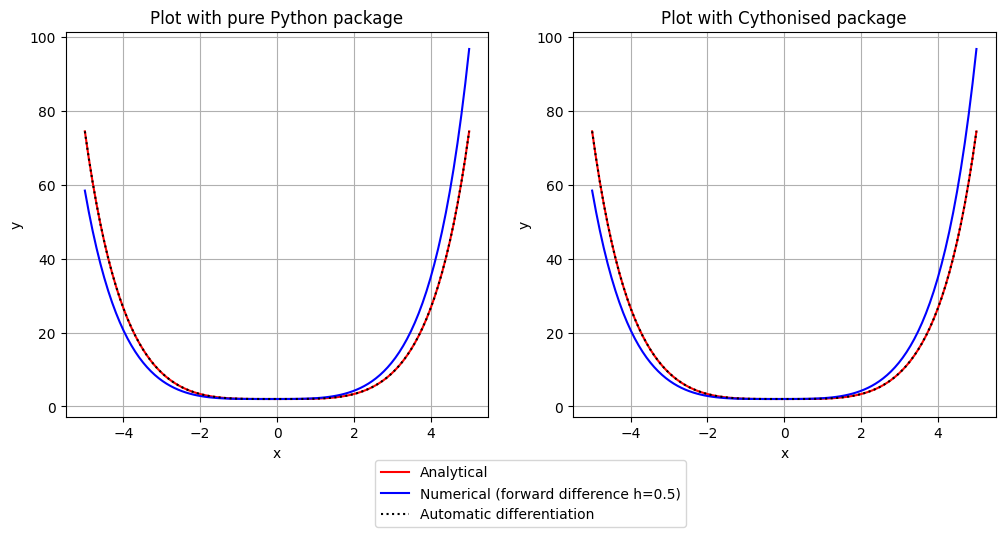

In [9]:
# Define the function f(x)
def f1(x):
    return np.sin(x) + np.sinh(x)

# Define analytical derivative of f(x)
def der_f1(x):
    return np.cos(x) + np.cosh(x)

# Plots range
x_space = np.linspace(-5,5,100)

# Setting up for Dual and DualX
x1 = Dual(x_space, 1)
xc1 = DualX(x_space,1)

# Defining function in terms of dual numbers
fx1_dual = x1.sin() + x1.sinh()
fxc1_dual = xc1.sin() + xc1.sinh()

# Setting up for NumDiff and NumDiffX
h = 0.5 # chose large value of h to exagerate the difference
fx1 = NumDiff(f1, x_space, h)
fxc1 = NumDiffX(f1,x_space,h)

# Computing Numerical Derivative with NumDiff and NumDiffX
num_der_f1 = fx1.first_forward()
num_der_fc1= fxc1.first_forward()

# Plotting the results

fig, ax = plt.subplots(1,2, figsize = (12, 5)) # making subplots

# Pure Python
ax[0].plot(x_space, der_f1(x_space), color = 'red', label = 'Analytical')
ax[0].plot(x_space, num_der_f1, color = 'blue', label = f'Numerical (forward difference h={h})')
ax[0].plot(x_space, fx1_dual.dual, color = 'black', linestyle=':', label='Automatic differentiation')
ax[0].set_title('Plot with pure Python package')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].legend(loc = 'center', bbox_to_anchor=(1.1,-0.2))
ax[0].grid()
# Cython
ax[1].plot(x_space, der_f1(x_space), color = 'red', label = 'Analytical')
ax[1].plot(x_space, num_der_fc1, color = 'blue', label = f'Numerical (forward difference h={h})')
ax[1].plot(x_space, fxc1_dual.dual, color = 'black', linestyle=':', label='Automatic differentiation')
ax[1].set_title('Plot with Cythonised package')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].grid()

plt.show()

As one expects, from the above plot one can obesrve that the derivative computed using automatic differentiation is exact!

 ##### Tackling Task 5 with Dual Numbers and Numerical Derivatives
 
 Computing the derivative of $f(x)$:
 $$
 \begin{align*}
 f(x) &= log(sin(x)) + x^2cos(x)\\
 f'(x) &= cot(x) +  2xcos(x) - x^2sin(x)
 \end{align*}
 $$
 When one defines the dual variable $x$ to determine the derivative of any fucntions $f(x)$ with respect to $x$, should always set the dual part of $x$ equal to $1$. For instance, running the code `x = Dual(1.5, 1)`, will ensure that the derivative of the function $f(x)$ at $Real(x) = 1.5$ is given by the dual part of $f(x)$. Given $x = a + \epsilon b$, then:
  $$
\begin{align*} 
f(x) = f(a + \epsilon b) = f(a) + \epsilon b f'(a)\\
\end{align*}
$$
  set $b=1$ thus,
$$
\begin{align*} 
f(x) = f(a + \epsilon) = f(a) + \epsilon f'(a)
\end{align*}
$$
Hence the derivative of $f(x)$ is given by its dual part.

Let us code the above:

In [17]:
# f(x)
def f(x):
    return np.log(np.sin(x)) + x**2*np.cos(x)

# f'(x) 
def df_true(x):
    return 1/np.tan(x) + 2*x*np.cos(x) - x**2*np.sin(x)

# Dual derivative
x = Dual(1.5,1) # set dual part equal to 1
f_dual = x.sin().log() + (x**2)*x.cos()
df_dual = f_dual.dual # take the dual part of f to find its derivative at x.real=1.5 

# Numerical solution
h = 0.01 # step size
ndf = NumDiff(f, x.real, h) # x=1.5 
ndf_for = ndf.first_forward() # forward difference
ndf_cen = ndf.first_central() # central difference
ndf_bac = ndf.first_backward() # backward difference

# Analytical derivative
true_der = df_true(x.real)

# defining all measures to determine the ratio and the error between analytical and dual/numerical
def ratio(n,m):
    return abs(n/m)

def absolute_error(n,m):
    return abs(n-m)

# Create a dataset to display the impormation collected using pandas

information = {
    "Automatic Differentiation": [df_dual, ratio(df_dual,true_der), absolute_error(df_dual, true_der)],
    "Forward Differentiation": [ndf_for, ratio(ndf_for,true_der), absolute_error(ndf_for, true_der)],
    "Central Differentiation": [ndf_cen, ratio(ndf_cen,true_der), absolute_error(ndf_cen, true_der)],
    "Backward Differentiation":[ndf_bac, ratio(ndf_bac,true_der), absolute_error(ndf_bac, true_der)]
}

results = pd.DataFrame(information, index=["Results", "Ratio", "Absolute Error"])
results # Displaying the output in a nice format

,Automatic Differentiation,Forward Differentiation,Central Differentiation,Backward Differentiation
Results,-1.961237,-1.996346,-1.961308,-1.926270
Ratio,1.000000,1.017901,1.000036,0.982171
Absolute Error,0.000000,0.035109,0.000071,0.034967


#### Dual vs Numerical
As we can observe from the above table, automatic differentiation is exact, hence one can now measure the error of the three different numerical methods applyed for differntiation. A good way to visualise the error is through loglog plots. But before we do that, we shall plot the ration between the analytical derivative and automatic derivative. 

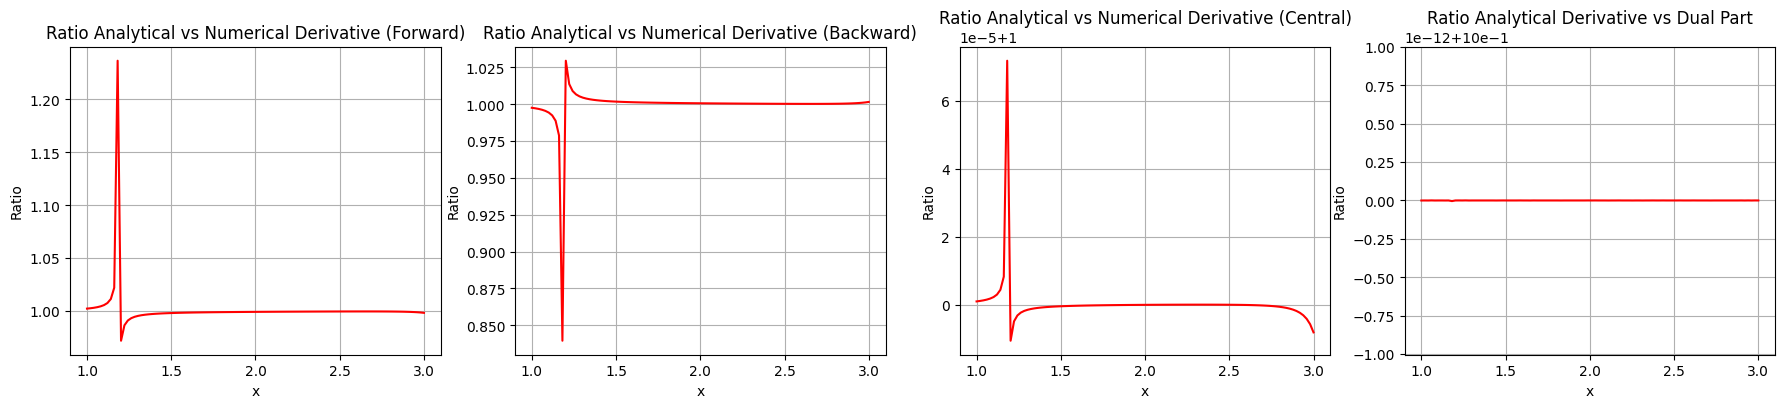

In [27]:
# f(x)
def f(x):
    return np.log(np.sin(x)) + x**2*np.cos(x)

# f'(x) 
def df_true(x):
    return 1/np.tan(x) + 2*x*np.cos(x) - x**2*np.sin(x)

x_space = np.linspace(1,3,100) # same as before define a range of real values

# Numerical solution
h = 0.001 # step size
ndf = NumDiff(f, x_space, h)  
ndf_for = ndf.first_forward() # forward difference
ndf_cen = ndf.first_central() # central difference
ndf_bac = ndf.first_backward() # backward difference

# using Dual
x = Dual(x_space, 1) # defining variable 
function_x = x.sin().log() + (x**2)*x.cos() # defining function
ratio_ = df_true(x_space)/(function_x.dual) # defining ratio


fig, ax = plt.subplots(1,4, figsize = (22, 4)) # making subplots

# Forward difference
ax[0].plot(x_space, df_true(x_space)/ndf_for, color = 'red')
ax[0].set_title('Ratio Analytical vs Numerical Derivative (Forward)')
ax[0].set_xlabel('x')
ax[0].set_ylabel('Ratio')
ax[0].grid()

# Backward difference
ax[1].plot(x_space, df_true(x_space)/ndf_bac, color = 'red')
ax[1].set_title('Ratio Analytical vs Numerical Derivative (Backward)')
ax[1].set_xlabel('x')
ax[1].set_ylabel('Ratio')
ax[1].grid()

# Central difference
ax[2].plot(x_space, df_true(x_space)/ndf_cen, color = 'red')
ax[2].set_title('Ratio Analytical vs Numerical Derivative (Central)')
ax[2].set_xlabel('x')
ax[2].set_ylabel('Ratio')
ax[2].grid()

# Automatic difference
ax[3].plot(x_space, ratio_, color= 'red')
ax[3].set_xlabel('x')
ax[3].set_ylabel('Ratio')
ax[3].set_title('Ratio Analytical Derivative vs Dual Part')
ax[3].grid()
plt.show()


#### LogLog Plots
Using `loglog plots` is a common approach to visualize and measure errors across scales, especially in numerical methods and scientific computations. So here is how we are going to do it. 

- Evaluate the derivative at a single point $x=1.5$
- Compute the numerical derivative for a range of values $h \in [0.001, 1]$
- Take the square difference 
- Plot the results into a `loglog` plot
- Comment on the results

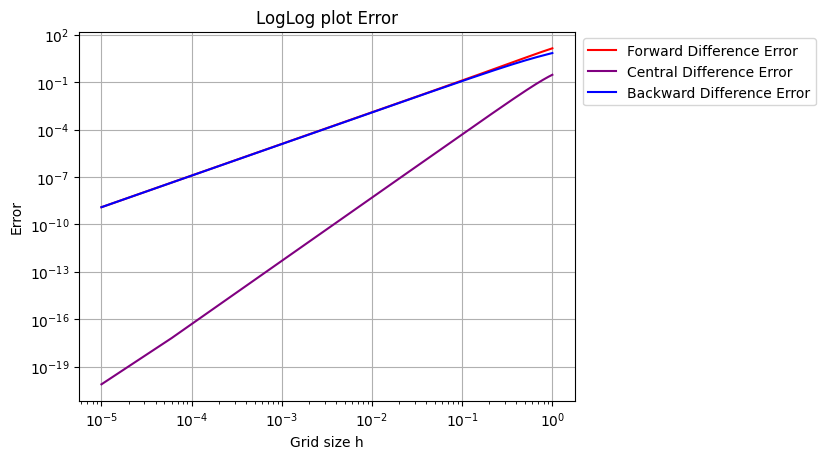

In [23]:
# f(x)
def f(x):
    return np.log(np.sin(x)) + x**2*np.cos(x)


x = Dual(1.5, 1) # defining variable 
function_x = x.sin().log() + (x**2)*x.cos() # defining function
true_der = function_x.dual

h_space = np.arange(0.00001, 1, 0.00005) # define ranage of values for h

der_f = NumDiff(f, 1.5, h_space) # first step for numerical derivative
# Define each different numerical derivative
forward_der = der_f.first_forward()
central_der = der_f.first_central()
backward_der = der_f.first_backward()

# evaluating the square errors
error_forward = (true_der-forward_der)**2
error_central = (true_der-central_der)**2
error_backward = (true_der-backward_der)**2

# loglog plots

plt.loglog(h_space, error_forward, color = 'red', label='Forward Difference Error')
plt.loglog(h_space, error_central, color = 'purple', label='Central Difference Error')
plt.loglog(h_space, error_backward, color = 'blue', label='Backward Difference Error')
plt.xlabel('Grid size h')
plt.ylabel('Error')
plt.title('LogLog plot Error')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.grid()
plt.show()

<b>Comments</b>

1. Forward Difference (Red):
   * The error decreases linearly as h decreases, indicating first-order accuracy i.e. $\mathcal{O}h$
2. Central Difference (Purple):
   * The error decreases at a steeper rater compared to the other two difference methods, showing second-order accuracy i.e. $\mathcal{O}h^2$
3. Backward Difference (Blue):
   * Similarly to the Forward Difference method, the error decreases linearly, indicating first-order accuracy i.e $\mathcal{O}h$. 

<b>Conclusion:</b>
- Central Difference is the most accurate method as it achieves faster error reduction with decreasing $h$.
- Forward Difference and Backward Difference are less accurate but exhibit comparable performance.

#### Test Suiete

There is a test suite implemented for the pure Python classes `Dual` and `NumDiff`. This is how the tests directory is structured:
```bash
   ├── tests
   │   ├── __init__.py
   │   ├── test_dad.py
   │   └── test_ndiff.py
```
This allows the user to download the test suite as a package and run in on the notebook. 

Alternatively the user can run the test suite in the terminal with the following commad:
```bash
   pytest -s tests/*
```
(Make sure your Python virtual environment is active)

In [3]:
# Running test on the Notebook
from tests import TestDual
from tests import NumDiff
import ipytest

TestDual
NumDiff
ipytest.run()

======================================= test session starts ========================================
platform linux -- Python 3.12.3, pytest-8.3.4, pluggy-1.5.0
rootdir: /root/Document/C1_Cw/mem97
configfile: pyproject.toml
collected 19 items

t_3e6bf4223a4e450cbc4d5a068d47bc83.py ...................                                    [100%]

======================================== 19 passed in 0.09s ========================================


<ExitCode.OK: 0>

### Automatic Differentiation In 1D

As we have seen before:

For a function $f(x)$, whose domain are dual numbers, i.e. $a + \epsilon b$, where both $a,b \in \mathbb{R}$, then
$$
f(a + \epsilon b) = f(x)|_{x=a} + \epsilon b f'(x)|_{x=a}
$$
Can we exten this concept into higher dimensions?


### Automatic Differentiation In Higher Dimensions

We have seen how automatic differentiation using dual numbers is utilised in one dimension, but can we extend this into higher dimensions?  The answer is yes. One can compute first order partial derivatives with respect to each variable for a high dimensional function. 

Consider the function $f(\vec{x})$, where $\vec{x} = (x_1, x_2,...,x_n)^T$, whose domain $\vec{a} + \epsilon \vec{b}$, where $\vec{a} = (a_1, a_2,...,a_n)^T$ and $\vec{b} = (b_1, b_2,...,b_n)^T$, then we can extend the one dimensional model to higher dimensions as follow:
$$
f(\vec{a} + \epsilon \vec{b}) = f(\vec{x})|_{\vec{x}=\vec{a}} + \epsilon \sum^n_{i=1} b_i \frac{\partial f(\vec{x})}{\partial x_i}|_{\vec{x} = \vec{a}}
$$

If we set all $b_i=1$ then the dual part of $f(\vec{a} + \epsilon \vec{b})$ will be the sum of partial derivatives evaluated at $\vec{x} = \vec{a}$, but what if one wants to perform the partial derivative with repsect to a single valriable? The answer this question rather simple, we need to elimina the unwanted partial derivatives.

Let us define a new function $f_j(\vec{x})$, such that:
$$
f_j(\vec{a} + \epsilon \vec{b}) = f(\vec{x})|_{\vec{x}=\vec{a}} + \epsilon \sum^n_{i=1} \delta_{ij} b_i \frac{\partial f(\vec{x})}{\partial x_i}|_{\vec{x} = \vec{a}}
$$ 
where $\delta_{ij}$ is the kronecker delta, such that;
$$
\delta_{ij} = 
\begin{cases} 
0 & \text{when } i \neq j \\ 
1 & \text{when } i = j\\
\end{cases}
$$
And $\vec{b} = [1,1,1,...,1]^T$, $\vec{a}$ is the collection of point where the partial derivative of $f(\vec{x})$ is evaluated at. One can simplify the above equation into:
$$
f_j(\vec{a} + \epsilon \vec{b}) = f(\vec{x})|_{\vec{x}=\vec{a}} + \epsilon b_j \frac{\partial f(\vec{x})}{\partial x_j}|_{\vec{x} = \vec{a}}
$$

The index $j$ is the albitrary choice of the variable we want to differentiate for, e.g. if one wants to compute the partial derivative of $f(\vec{x})$ with respect to $x_2$ then set $j=2$, here we will see how:



Quick example on how to use `partial_derivative` from `Dual` and `DualX`

Consider the function $f(x,y,z) = xy + x\cos{z} + \sin{y}$, one can compute the partial derivative with respect to each variable $x,y$ and $z$, at the point $(1, -1, 2)$ using classes `Dual` and `DualX`.

In [ ]:
# Define the fucntion we want to differentaiate
def f(x,y,z):
    return x*y + x*z.cos() + y.sin()


""" 

Computing partial derivatives, the first entery in partial_derivative(j,f,**args), j is the
index we want to differentiate with respect too i.e. x,y or z, their repsective enteries are 0,1 and 2 
(i.e. for the variable x, the index j takes value j=0 and so on).

"""

# Pure Python
# To initialise the code we need a dummy variable say d
d = Dual(0,0)
x,y,z=Dual(1,0),Dual(-1,0),Dual(2,0)

x_partial = d.partial_derivative(0,f,x,y,z) # partial derivative with respect to x use index 0
y_partial = d.partial_derivative(1,f,x,y,z) # partial derivative with repsect to y use index 1
z_partial = d.partial_derivative(2,f,x,y,z) # partial derivative with respect to z use index 2

# Cython (repeate the same process from the pure Python version)
dc = DualX(0,0)
xc,yc,zc = DualX(1,0),DualX(-1,0),DualX(2,0)
xc_partial = dc.partial_derivative(0,f,xc,yc,zc) # partial derivative with respect to x use index 0
yc_partial = dc.partial_derivative(1,f,xc,yc,zc) # partial derivative with repsect to y use index 1
zc_partial = dc.partial_derivative(2,f,xc,yc,zc) # partial derivative with respect to z use index 2

print('Results from pure Python class Dual:')
print(f"Partial derivaive of f with respect to x, at x,y,z=1,-1,2 is {x_partial}")
print(f"Partial derivaive of f with respect to y, at x,y,z=1,-1,2 is {y_partial}")
print(f"Partial derivaive of f with respect to z, at x,y,z=1,-1,2 is {z_partial}")
print('')
print('Results from Cythonised class DualX:')
print(f"Partial derivaive of f with respect to x, at x,y,z=1,-1,2 is {xc_partial}")
print(f"Partial derivaive of f with respect to y, at x,y,z=1,-1,2 is {yc_partial}")
print(f"Partial derivaive of f with respect to z, at x,y,z=1,-1,2 is {zc_partial}")




Results from pure Python class Dual
Partial derivaive of f with respect to x, at x,y,z=1,-1,2 is -1.4161468365471424
Partial derivaive of f with respect to y, at x,y,z=1,-1,2 is 1.5403023058681398
Partial derivaive of f with respect to z, at x,y,z=1,-1,2 is -0.9092974268256817

Results from Cythonised class DualX
Partial derivaive of f with respect to x, at x,y,z=1,-1,2 is -1.4161468365471424
Partial derivaive of f with respect to y, at x,y,z=1,-1,2 is 1.5403023058681398
Partial derivaive of f with respect to z, at x,y,z=1,-1,2 is -0.9092974268256817


#### Comparing Performance of the Pure Python Version and the Cythonised Version

To compare performance between the pure Python vs the Cythonised vesrions of the package we are going to use the module `timeit`. 

The `timeit` module in Python is a standard library tool used to measure the execution time of small code snippets. It is particularly useful for benchmarking and identifying performance bottlenecks.

Here some key features of `timeit`:

1. Accurate Timing:
   - `timeit` disable useless collections and runs code multiple times to provide a more accurate measurement of execution time
      (by default `timeit` will output an estimate of time per loop, including mean time and its standard deviation).

2. Easy to Use:
   - You can measure execution time of code directly in a script or interactively in the Python shell.

3. Adaptive:
   - You can control the number of repetitions and iterations to balance accuracy and performance.

For our purposes we do not need to customise `timeit`, instead we are going to use its default features. For more information on how to use `timeit`, please see [timeit](https://docs.python.org/3/library/timeit.html).

We want to compare the following performances:
1. `Dual` vs `DualX`
2. `NumDiff` vs `NumDiffX`

For case (1), we want to performe the comparison twice, with the simplest function (i.e. retun a dual number) and then with a more complex function (taking the dual and real part separately of a function).

In [36]:
'''

Defining 4 sets of functions, 2 simple (Python and Cython), and 2 complex (Python and Cython)

'''
# Simple functions, return a dual number

# Python
def test_dual_simple(a,b):
    return Dual(a,b)

# Cython
def test_dual_x_simple(a,b):
    return DualX(a,b)  

# Complex funtion, return real and dual part separalely

# Python
def test_dual_complex(a,b):
    x=Dual(a,b)
    func= x.sin()+x.cos() + x**2*x.exp() + x.tanh() 
    real = func.real
    dual = func.dual
    return real, dual 

# Cython
def test_dual_x_complex(a,b):
    x=DualX(a,b)
    func= x.sin()+x.cos() + x**2*x.exp() + x.tanh() 
    real = func.real
    dual = func.dual
    return real, dual 


In [46]:
import timeit # importing required package

""" 

%timeit -n <number_of_loops> -r <number_of_runs> <code_to_test>

After -n insert number of loops
After -r insert number of runs

I am running tests for 10**7 loops, if is too much for your local machine, 
please feel free to lower the number of loops or the number of runs!

"""

print('Simple Test')
print('Python:')
%timeit -n 10000000 -r 10 test_dual_simple(2,1) # simple test for Python
print('Cython:')
%timeit -n 10000000 -r 10 test_dual_x_simple(2,1) # simple test for Cython
print('')
print('Complex Test')
print('Python:')
%timeit -n 10000000 -r 10 test_dual_complex(100,345) # complex test for Python
print('Cython:')
%timeit -n 10000000 -r 10 test_dual_x_complex(100,345) # complex test for Cython

Simple Test
Python:
148 ns ± 3.99 ns per loop (mean ± std. dev. of 10 runs, 10,000,000 loops each)
Cython:
88.1 ns ± 2.02 ns per loop (mean ± std. dev. of 10 runs, 10,000,000 loops each)

Complex Test
Python:
10.1 μs ± 65.3 ns per loop (mean ± std. dev. of 10 runs, 10,000,000 loops each)
Cython:
9.39 μs ± 1.29 μs per loop (mean ± std. dev. of 10 runs, 10,000,000 loops each)


From the above result, one can notice that the Cythonised version of the package is faster for both tests (as one my expect), in the simple test the Cythonised version is significantly faster than the pure Python version, but there is not much difference between the two for the complex test in terms of performance. 

<b>Difference between the two test</b>

<u>Simple Test</u>: In the simple test, we constructed a function that runs the simplest task, takes two variable as input a that will be allocated as real and dual part of a number, i.e. `Dual(a,b)` for pure Python, and `DualX(a,b)` for the Cythonised version, here the Cythonised version is much faster.

<u>Complex Test</u>: In the complex test, we constructed a function that takes two variables as input and allocates them into real and dual part, there are two majior differences between complex and simple test.

1. Simple test we are allocating input into real and dual part, while in the complex case we allocate the input to a dual number $x$. Then we evaluate the function $f(x) = \sin{x}+ \cos{x} + x^2e^x + \tanh{x}$ with the dual number $x$.
2. After evaluating $f(x)$ at $x = a + \epsilon b$, the functions `test_dual_complex` and `test_dual_x_complex` retun the real and dual part separately. This is not a problem for the pure Python version as no major modifications are implemented in order to return `.real` and `.dual` separately, while this caused some issues when Cythonising the package, i.e. it would not recognise `.real` and `.dual`. To overcome the prolem two extra functions were implemented using `@property`, `def real(self)` and `def dual(self)`, to return `.real` and `.dual`. I belive this is one of the reason why for the complex test the Cythonised version is only outpefroming the pure Python version by $0.71 \mu s$ (this is the result obtained when running the code, the user my get a different answer). Furthermore, when defining input varicbles with `cdef`, `object` was utilised instead of `double`, this significantly slows down perfomance, but allows more fexilibility, e.g. takes arrays as inputs.

<b>What are the difference between `double` and `object`</b> 

`double`:

`double` reoresents a C-style double-precision floating point number. This is used when high-perfomance numerical computations is required, furthermore this works directly with C-style numeric types. `double` has a fixed size (usually 8 bytes) and does not involve Python's memory managment, this performs much faster than Python's `float`(a `float` in Python is an `object` type). 

Limitations:

- Cannot handle Python's arbitrary-precision floats.
- Cannot be `None` or any other non-numerical values
- Less flexible than `object`, as mentioned `double` does not take arrays

`object`:

This represents a generic Python `object` and it can hold any type of Python data (e.g. `int`, `float`, `lists`, `str` or custom objects). This is generally used its flexibility as it allows interaction with Python's dynamic typing system. In terms of memory usage, `object` is more expensive than `double` as it uses Python's heap memory and is managed by Python's garbage collector. 

Limitations:

- Significantly slower than `double`

<b>Conclusion</b>:

In our scenario, (we are not looking for extrimely fast performance) we are trading run time with flexibility.

In [47]:
''' 
Testing NumDiff and NumDiffX performances

'''

# Define function we want to differentiate
def f(x):
    return x**2 + np.exp(-x)

In [48]:
''' 

For both pure Python and Cythonised versions, we are going to perform a test
on the central difference (as we have previusly seen is also the most accurate
of the 3 different first order numerical derivatives)

'''

# Pure Python
def non_cythonized(f, x, h):
    der=NumDiff(f,x,h)
    return der.first_central()

# Cythonised
def cythonized(f, x, h):
    der=NumDiffX(f,x,h)
    return der.first_central()

In [50]:

print('Python test:')
%timeit -n 1000000 -r 10 non_cythonized(f,2,0.1)
print('')
print('Cython test')
%timeit -n 1000000 -r 10 cythonized(f,2,0.1)


Python test:
2.03 μs ± 45.6 ns per loop (mean ± std. dev. of 10 runs, 1,000,000 loops each)

Cython test
1.92 μs ± 22.7 ns per loop (mean ± std. dev. of 10 runs, 1,000,000 loops each)


### Exercises

Now try yourself. 

Complete the following sets of exercises, in case of multivariable function compute the partial derivative with respeact to each variable, solutions are provided in the Solutions.ipynb:

1. Compute the derivative by hand of the following functions:

   - Polynomial

   \begin{equation}
   f(x) = x^3 - 4x^2 + 6x - 2 \tag{1}
   \end{equation}
    
   - Exponential

   \begin{equation}
   g(x) = e^x - 2x\tag{2}
   \end{equation}

   - Trigonometric

   \begin{equation}
   h(x) = \sin{x} + \cos{2x}\tag{3}
   \end{equation}

   - Two-Variable Function

   \begin{equation}
   f(x,y) = x^2 + y^2 + 3xy - 5\tag{4}
   \end{equation}

   - Three-Variable Function

   \begin{equation}
   g(x,y,z) = e^{x+y}cos(z) - x^2 + y\tag{5}
   \end{equation}

2. Now compute the derivative of each function using the module `dual_autodiff` or `src.dual_autodiff_x`, at $x=2$ for Eq. (1,2,3), $(x,y)=(-1,1)$ for Eq. (4) and $(x,y,z) = (2,3,-4)$ for Eq. (5), compare the results with part 1. 